# 🩺 BRFSS Diabetes Data Study

In [1]:
# prompt: drive mount code

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes_012_health_indicators_BRFSS2015.csv")

In [4]:
data.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
data.shape

(253680, 22)

In [6]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [7]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [8]:
v_counts(data)


Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
_____________________________________________________________________________
HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64
_____________________________________________________________________________
HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64
_____________________________________________________________________________
CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64
_____________________________________________________________________________
BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
86.0        1
91.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64
_____________________________________________________________________________
Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64
_____________________________________________________________________________
Stroke

In [9]:
data2 = data.copy()

## 🔄 Data Transformation

In [10]:

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 to 99'

data2.Diabetes_012[data2['Diabetes_012'] == 0] = 'No Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 1] = 'Prediabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 2] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $15,000'
data2.Income[data2['Income'] == 3] = 'Less Than $20,000'
data2.Income[data2['Income'] == 4] = 'Less Than $25,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $50,000'
data2.Income[data2['Income'] == 7] = 'Less Than $75,000'
data2.Income[data2['Income'] == 8] = '$75,000 or more'

<ipython-input-10-7722713db61f>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2.Age[data2['Age'] == 1] = '18 to 24'
<ipython-input-10-7722713db61f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise a

In [11]:
# data2.head() with max columns
pd.set_option('display.max_columns', None)
data2.head(5)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40.0,Yes,No,No,No,No,Yes,No,Yes,No,Excellent,18.0,15.0,Yes,Female,60 to 64,Senior High School,"Less Than $20,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25.0,Yes,No,No,Yes,No,No,No,No,Yes,Good,0.0,0.0,No,Female,50 to 54,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28.0,No,No,No,No,Yes,No,No,Yes,Yes,Excellent,30.0,30.0,Yes,Female,60 to 64,Senior High School,"$75,000 or more"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27.0,No,No,No,Yes,Yes,Yes,No,Yes,No,Fair,0.0,0.0,No,Female,70 to 74,Junior High School,"Less Than $50,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24.0,No,No,No,Yes,Yes,Yes,No,Yes,No,Fair,3.0,0.0,No,Female,70 to 74,Undergraduate Degree,"Less Than $25,000"


In [12]:
print(data2['BMI'].head())
print(data2['BMI'].dtype)

0    40.0
1    25.0
2    28.0
3    27.0
4    24.0
Name: BMI, dtype: float64
float64


## 🔍 Univariate Analysis

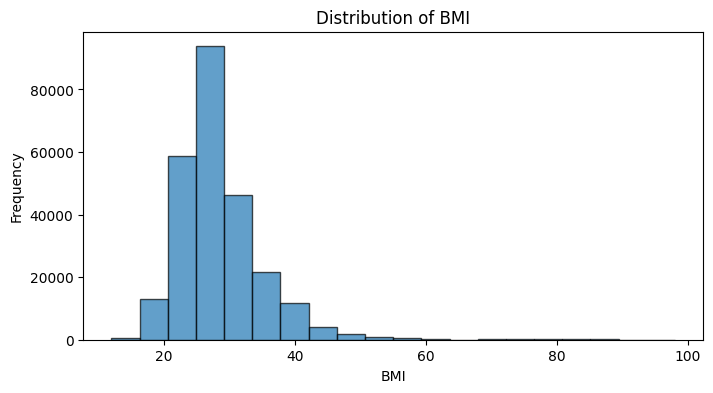

In [13]:
plt.figure(figsize=(8, 4))
plt.hist(data2['BMI'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

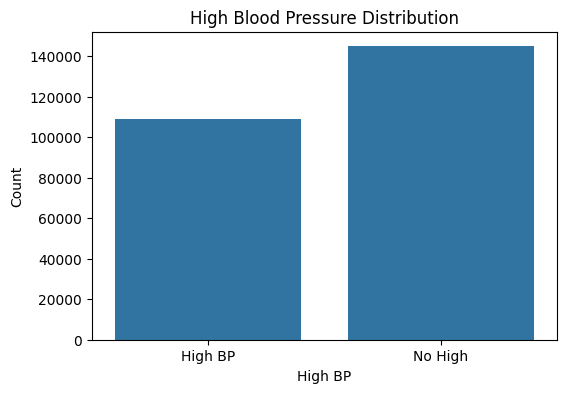

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data2, x='HighBP')
plt.title('High Blood Pressure Distribution')
plt.xlabel('High BP')
plt.ylabel('Count')
plt.show()

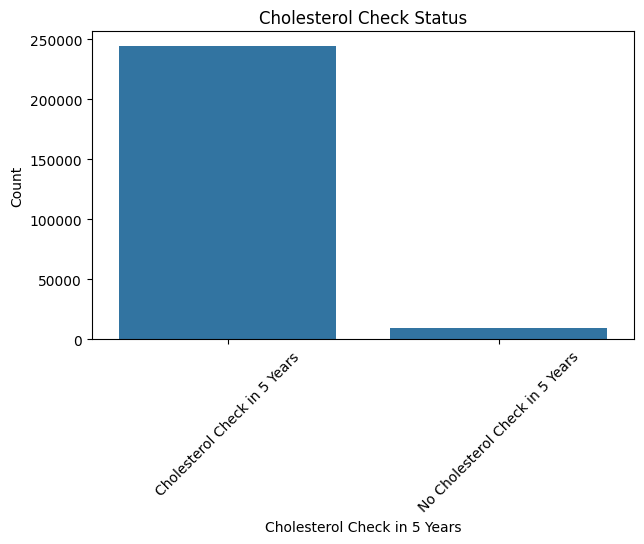

In [15]:
plt.figure(figsize=(7, 4))
sns.countplot(data=data2, x='CholCheck')
plt.title('Cholesterol Check Status')
plt.xlabel('Cholesterol Check in 5 Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

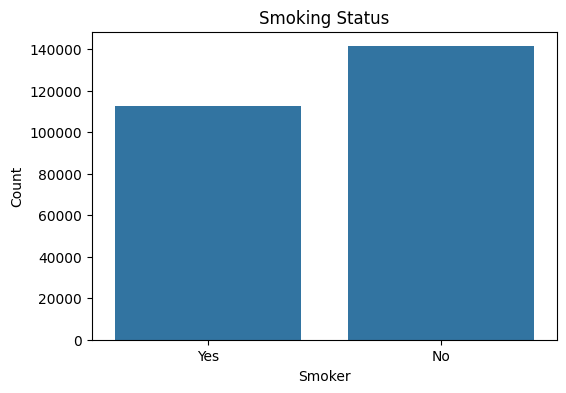

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data2, x='Smoker')
plt.title('Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

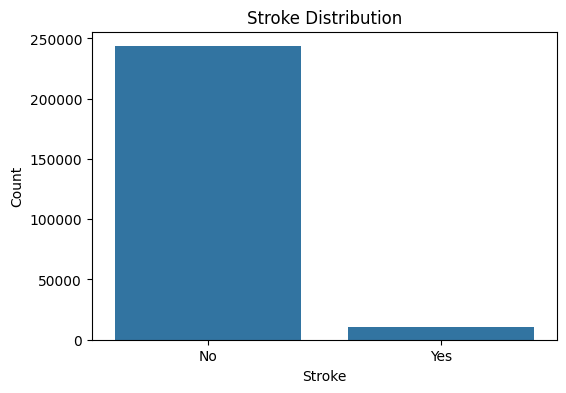

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data2, x='Stroke')
plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


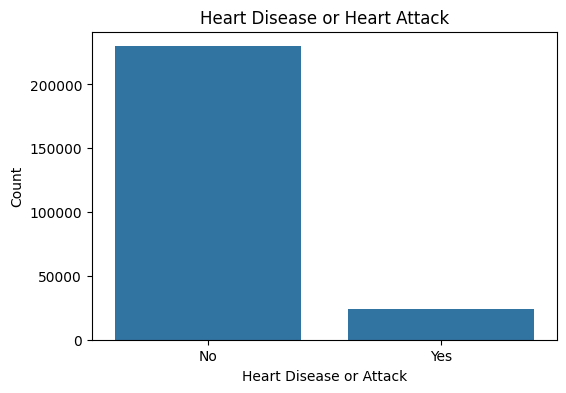

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data2, x='HeartDiseaseorAttack')
plt.title('Heart Disease or Heart Attack')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Count')
plt.show()


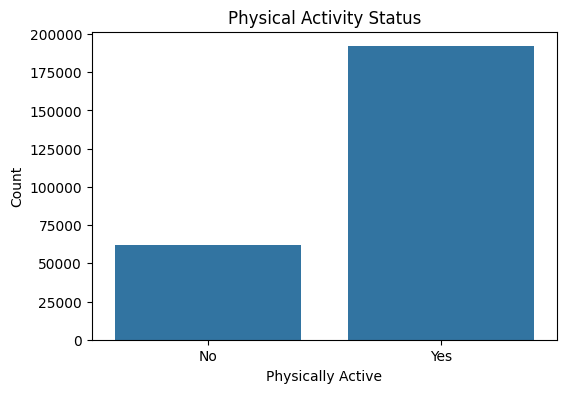

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data2, x='PhysActivity')
plt.title('Physical Activity Status')
plt.xlabel('Physically Active')
plt.ylabel('Count')
plt.show()

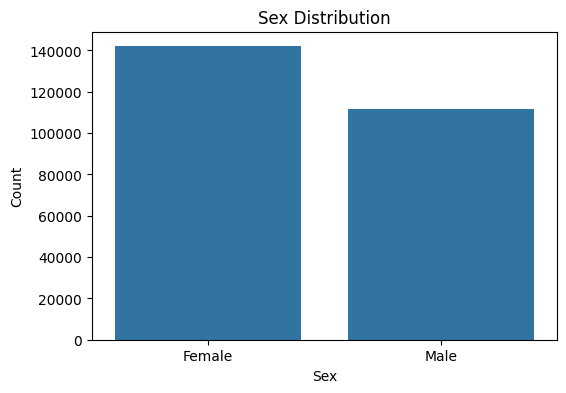

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data2, x='Sex')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

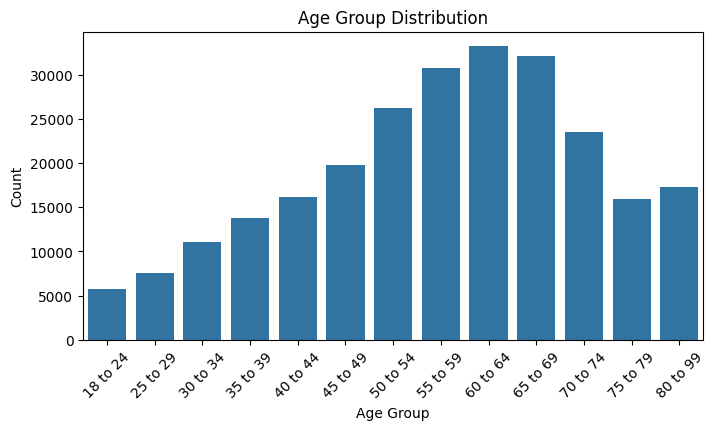

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data2, x='Age', order=sorted(data2['Age'].unique()))
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

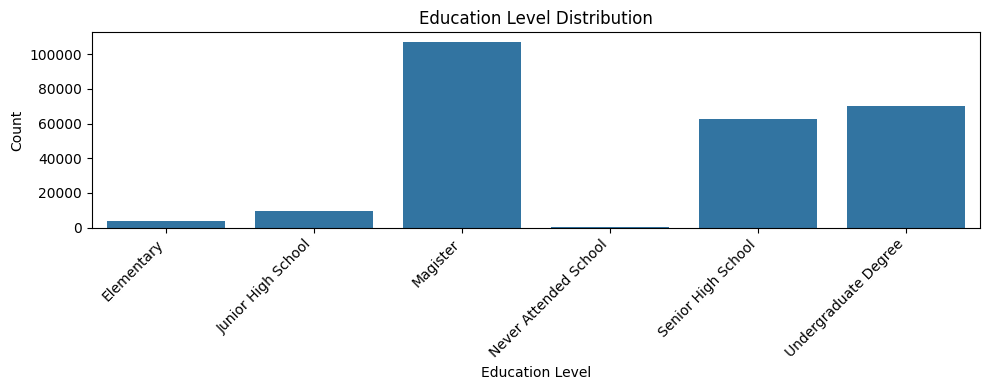

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data2, x='Education', order=sorted(data2['Education'].unique()))
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

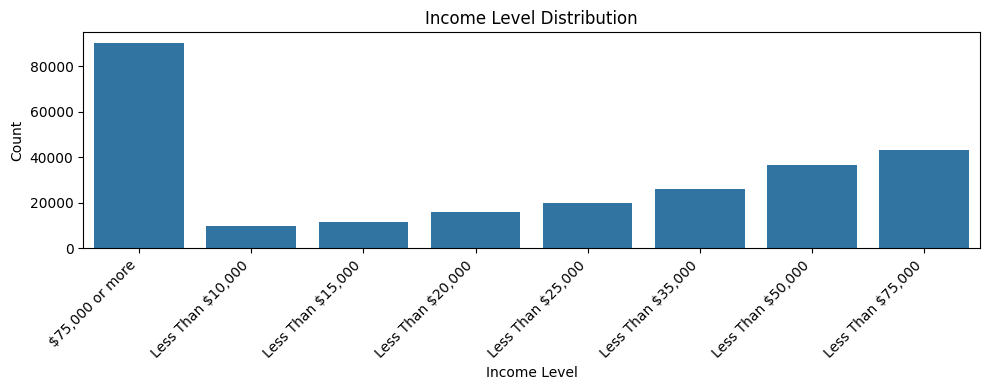

In [23]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data2, x='Income', order=sorted(data2['Income'].unique()))
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

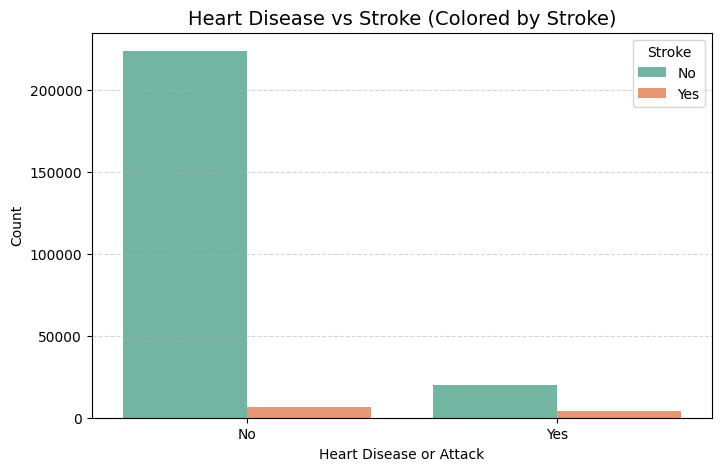

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data2, x='HeartDiseaseorAttack', hue='Stroke', palette='Set2')
plt.title('Heart Disease vs Stroke (Colored by Stroke)', fontsize=14)
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<ipython-input-25-86f48f1f2cdf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data2, x='PhysActivity', y='BMI', palette='coolwarm')


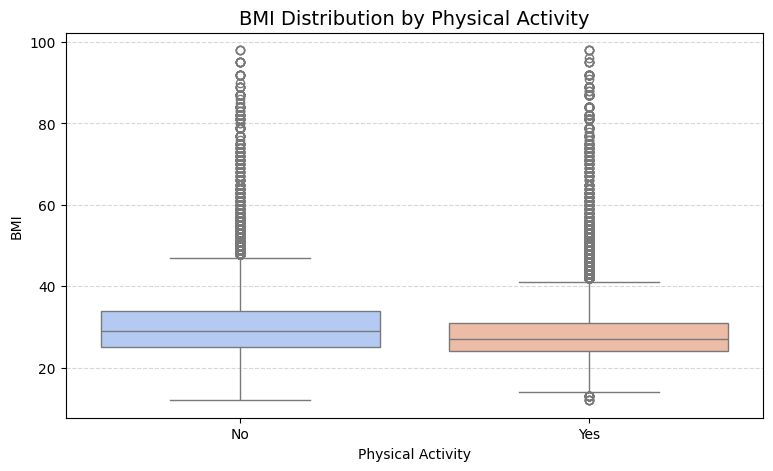

In [25]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=data2, x='PhysActivity', y='BMI', palette='coolwarm')
plt.title('BMI Distribution by Physical Activity', fontsize=14)
plt.xlabel('Physical Activity')
plt.ylabel('BMI')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


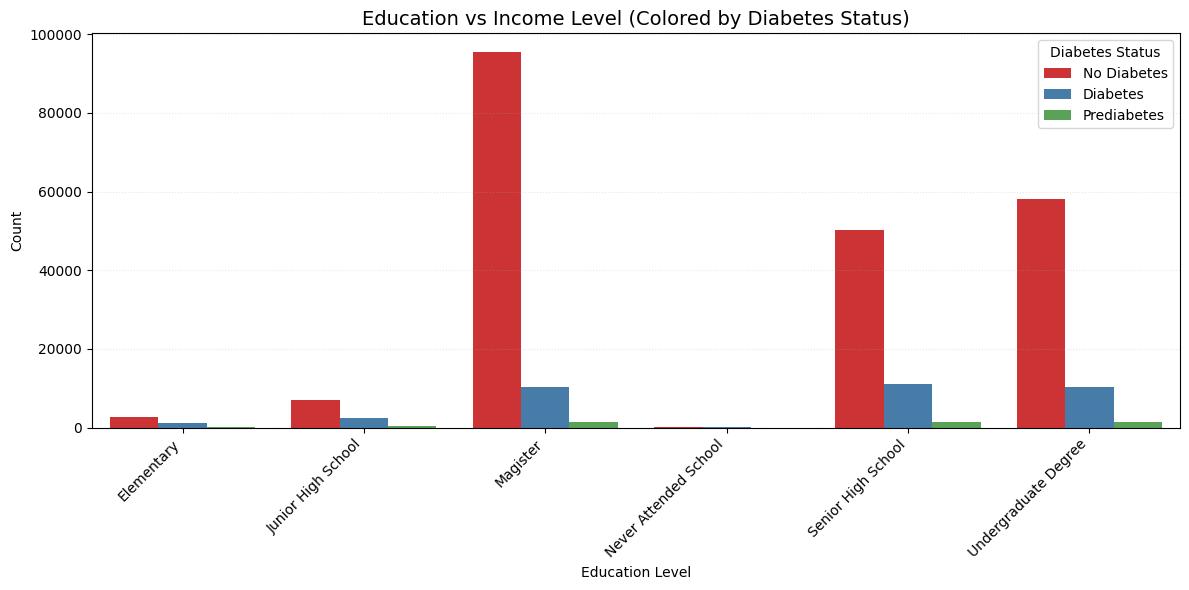

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data2, x='Education', hue='Diabetes_012', palette='Set1', order=sorted(data2['Education'].unique()))
plt.title('Education vs Income Level (Colored by Diabetes Status)', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diabetes Status')
plt.tight_layout()
plt.grid(axis='y', linestyle=':', alpha=0.3)
plt.show()

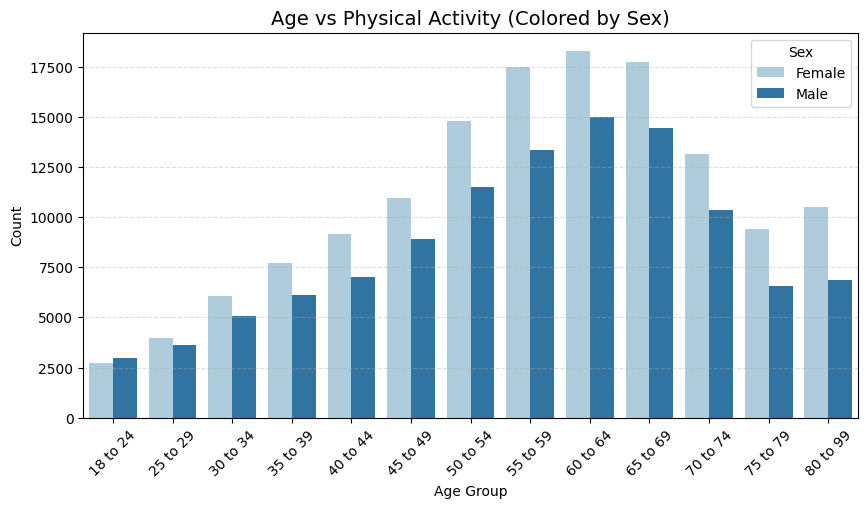

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data2, x='Age', hue='Sex', palette='Paired', order=sorted(data2['Age'].unique()))
plt.title('Age vs Physical Activity (Colored by Sex)', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


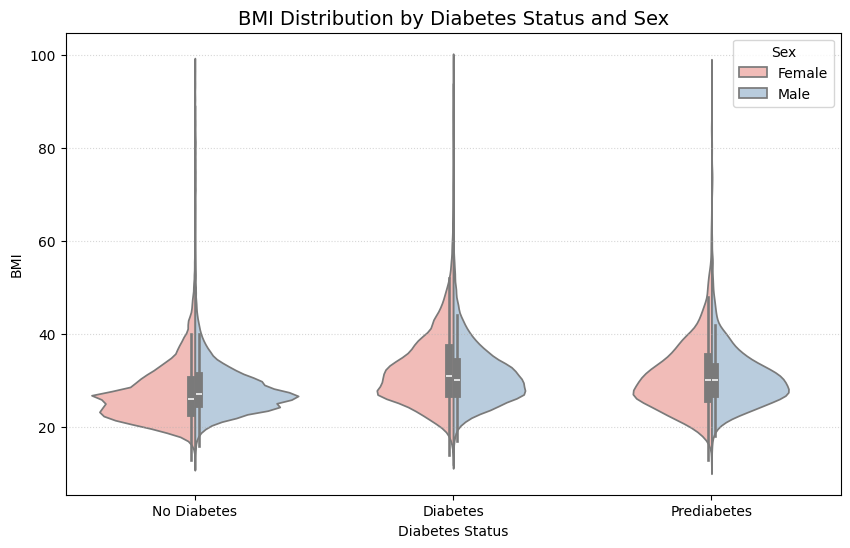

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data2, x='Diabetes_012', y='BMI', hue='Sex', split=True, palette='Pastel1')
plt.title('BMI Distribution by Diabetes Status and Sex', fontsize=14)
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import re

def preprocess_data2(data2, fit_scaler=True, scaler=None, split=True):
    """
    Preprocess diabetes dataset with options to fit/transform and split data.

    Parameters:
    -----------
    data2 : pandas DataFrame
        The input data to preprocess.
    fit_scaler : bool, default=True
        Whether to fit a new scaler or use an existing one.
    scaler : StandardScaler, default=None
        Pre-fitted scaler to use when fit_scaler is False.
    split : bool, default=True
        If True, returns X and y separately. If False, returns combined DataFrame.

    Returns:
    --------
    If split=True:
        df_scaled : pandas DataFrame
            Scaled features
        target : pandas Series
            Encoded target variable
        scaler : StandardScaler
            Fitted scaler object
    If split=False:
        df_combined : pandas DataFrame
            Combined DataFrame with features and target
        scaler : StandardScaler
            Fitted scaler object
    """
    df = data2.copy()

    # --- Extract and encode target safely ---
    target = df['Diabetes_012'].map({
        'No Diabetes': 0,
        'Prediabetes': 1,
        'Diabetes': 2
    })

    # Drop target from features
    df = df.drop(columns=['Diabetes_012'])

    # --- Convert Age ---
    df['Age'] = df['Age'].str.extract(r'(\d+)').astype(int)

    # --- Convert Income ---
    def income_to_numeric(income_str):
        if pd.isna(income_str):
            return None
        match_less = re.search(r'Less Than \$([\d,]+)', income_str)
        if match_less:
            return int(match_less.group(1).replace(',', ''))
        match_more = re.search(r'\$([\d,]+) or more', income_str)
        if match_more:
            return int(match_more.group(1).replace(',', ''))
        return None

    df['Income'] = df['Income'].apply(income_to_numeric)

    # --- One-hot encode ---
    categorical_cols = df.select_dtypes(include='object').columns
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # --- Scale ---
    if fit_scaler:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_encoded)
    else:
        scaled_data = scaler.transform(df_encoded)

    df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

    # Return based on split parameter
    if split:
        # Return X and y separately
        return df_scaled, target, scaler
    else:
        # Return combined DataFrame
        df_combined = df_scaled.copy()
        df_combined['Diabetes_012'] = target.values
        return df_combined, scaler

In [30]:
from sklearn.model_selection import train_test_split

# 1. Split raw data
train_raw, test_raw = train_test_split(data2, test_size=0.2, random_state=42, stratify=data2['Diabetes_012'])

# 2. Preprocess train (fit scaler)
X_train, y_train, scaler = preprocess_data2(train_raw, fit_scaler=True)

# 3. Preprocess test (use same scaler)
X_test, y_test, _ = preprocess_data2(test_raw, fit_scaler=False, scaler=scaler)


In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((202944, 28), (202944,), (50736, 28), (50736,))

In [32]:
X_train.head(5)

,BMI,MentHlth,PhysHlth,Age,Income,HighBP_No High,HighChol_No High Cholesterol,CholCheck_No Cholesterol Check in 5 Years,Smoker_Yes,Stroke_Yes,HeartDiseaseorAttack_Yes,PhysActivity_Yes,Fruits_Yes,Veggies_Yes,HvyAlcoholConsump_Yes,AnyHealthcare_Yes,NoDocbcCost_Yes,GenHlth_Fair,GenHlth_Good,GenHlth_Poor,GenHlth_Very Good,DiffWalk_Yes,Sex_Male,Education_Junior High School,Education_Magister,Education_Never Attended School,Education_Senior High School,Education_Undergraduate Degree
0,-0.209035,-0.430283,-0.486894,-0.657135,0.865596,0.866984,0.85743,-0.197892,-0.892302,-0.206084,-0.322956,-1.760553,-1.316586,-2.074022,-0.244368,0.227275,-0.303297,-0.736126,-0.651106,2.146239,-0.377641,-0.450541,1.127130,-0.197003,1.168809,-0.025608,-0.574285,-0.616341
1,-0.663822,-0.430283,-0.486894,-2.412242,-1.678303,0.866984,0.85743,-0.197892,-0.892302,-0.206084,-0.322956,0.568003,0.759540,-2.074022,-0.244368,0.227275,-0.303297,1.358463,-0.651106,-0.465931,-0.377641,-0.450541,-0.887209,-0.197003,-0.855572,-0.025608,-0.574285,1.622477
2,-0.209035,-0.430283,-0.486894,0.317925,0.865596,0.866984,0.85743,-0.197892,1.120697,-0.206084,-0.322956,0.568003,0.759540,-2.074022,-0.244368,0.227275,-0.303297,1.358463,-0.651106,-0.465931,-0.377641,-0.450541,1.127130,-0.197003,-0.855572,-0.025608,1.741295,-0.616341
3,-0.360631,-0.430283,-0.486894,-0.657135,0.865596,0.866984,0.85743,-0.197892,-0.892302,-0.206084,-0.322956,0.568003,0.759540,0.482155,-0.244368,0.227275,-0.303297,-0.736126,-0.651106,2.146239,-0.377641,-0.450541,1.127130,-0.197003,1.168809,-0.025608,-0.574285,-0.616341
4,1.913305,-0.430283,-0.486894,-0.657135,0.865596,0.866984,0.85743,-0.197892,-0.892302,-0.206084,-0.322956,0.568003,0.759540,0.482155,-0.244368,0.227275,-0.303297,1.358463,-0.651106,-0.465931,-0.377641,-0.450541,1.127130,-0.197003,1.168809,-0.025608,-0.574285,-0.616341


In [33]:
from sklearn.decomposition import PCA

def pca_library(X, n_components=2):
    """
    Perform PCA using Scikit-learn.
    Args:
        X (pd.DataFrame): Input data.
        n_components (int): Number of components to keep.
    Returns:
        X_pca (pd.DataFrame): Transformed data.
        pca (PCA): Fitted PCA object.
    """
    pca = PCA(n_components=n_components)
    X_pca_array = pca.fit_transform(X)
    X_pca = pd.DataFrame(X_pca_array, columns=[f"PC{i+1}" for i in range(n_components)])
    return X_pca, pca

def plot_pca(X_pca, y, title="PCA Plot"):
    """
    Plot PCA results.
    Args:
        X_pca (pd.DataFrame): PCA-transformed data.
        y (pd.Series): Target variable.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=X_pca, x='PC1', y='PC2', hue=y, palette='Set1', alpha=0.7)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Diabetes Status')
    plt.grid()
    plt.show()

In [34]:
#import numpy as np

#def pca_scratch(X, n_components=2):
#    X_centered = X - X.mean()
#    cov_matrix = np.cov(X_centered.T)
#    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvectors by descending eigenvalues
#    sorted_idx = np.argsort(eigenvalues)[::-1]
#    selected_vectors = eigenvectors[:, sorted_idx[:n_components]]

    # Project the data
#    X_pca = X_centered @ selected_vectors

    # Return as DataFrame with PC names
#    columns = [f'PC{i+1}' for i in range(n_components)]
#    return pd.DataFrame(X_pca, columns=columns, index=X.index), selected_vectors



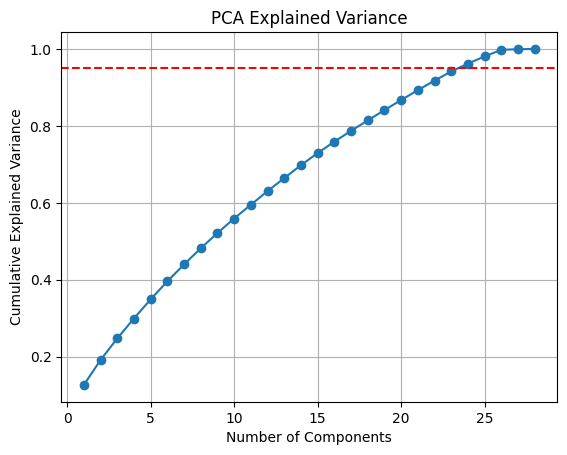

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=28)
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_.cumsum()

import matplotlib.pyplot as plt
plt.plot(range(1, 29), explained_variance, marker='o')
plt.axhline(0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


In [36]:
# Assuming you already have data2_processed
X_Train_pca_lib, pca_model = pca_library(X_train, n_components=20)

In [37]:
print(X_Train_pca_lib.head())
print(X_Train_pca_lib.describe())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.599572 -0.684470 -0.455116 -1.645947 -1.247353 -0.778556  2.568720   
1 -1.086844 -2.238501  0.559194  1.980942  0.579316  0.362684 -0.197264   
2 -0.805835 -0.159296  1.532834  1.010806 -2.059980  1.108931  0.676608   
3 -2.741679  0.042179 -1.365157 -1.523291  0.165391  0.301954  0.941730   
4 -2.214957  0.404728 -0.426273  0.777991 -0.864303 -1.472868 -0.718793   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.937859  0.882482  0.012746  0.255758  0.421954 -0.221013  0.603244   
1  1.304731  1.155028  0.390694  0.196042  0.959599 -0.815365 -0.387751   
2  0.168783 -0.280632 -0.252750 -0.064646  0.302196  0.122042 -1.292086   
3  0.304607  0.224347 -0.864948 -0.205423 -0.341269  0.035178 -0.562387   
4  0.464040  0.171160 -1.135953 -0.390139 -0.496338  0.712090 -1.065703   

       PC15      PC16      PC17      PC18      PC19      PC20  
0  0.062763 -1.417873 -0.055637 -0

Now just to keep track we got :
X_train
X_train_PCA_lip
X_train[selected_features]

🚀 Starting optimized feature selection...

🔍 Phase 1: Establishing baseline...

⚙️ Phase 2: Initial feature filtering...

🎯 Phase 3: Recursive Feature Elimination...
Fitting estimator with 28 features.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


Fitting estimator with 24 features.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(



📊 Phase 4: Final evaluation...


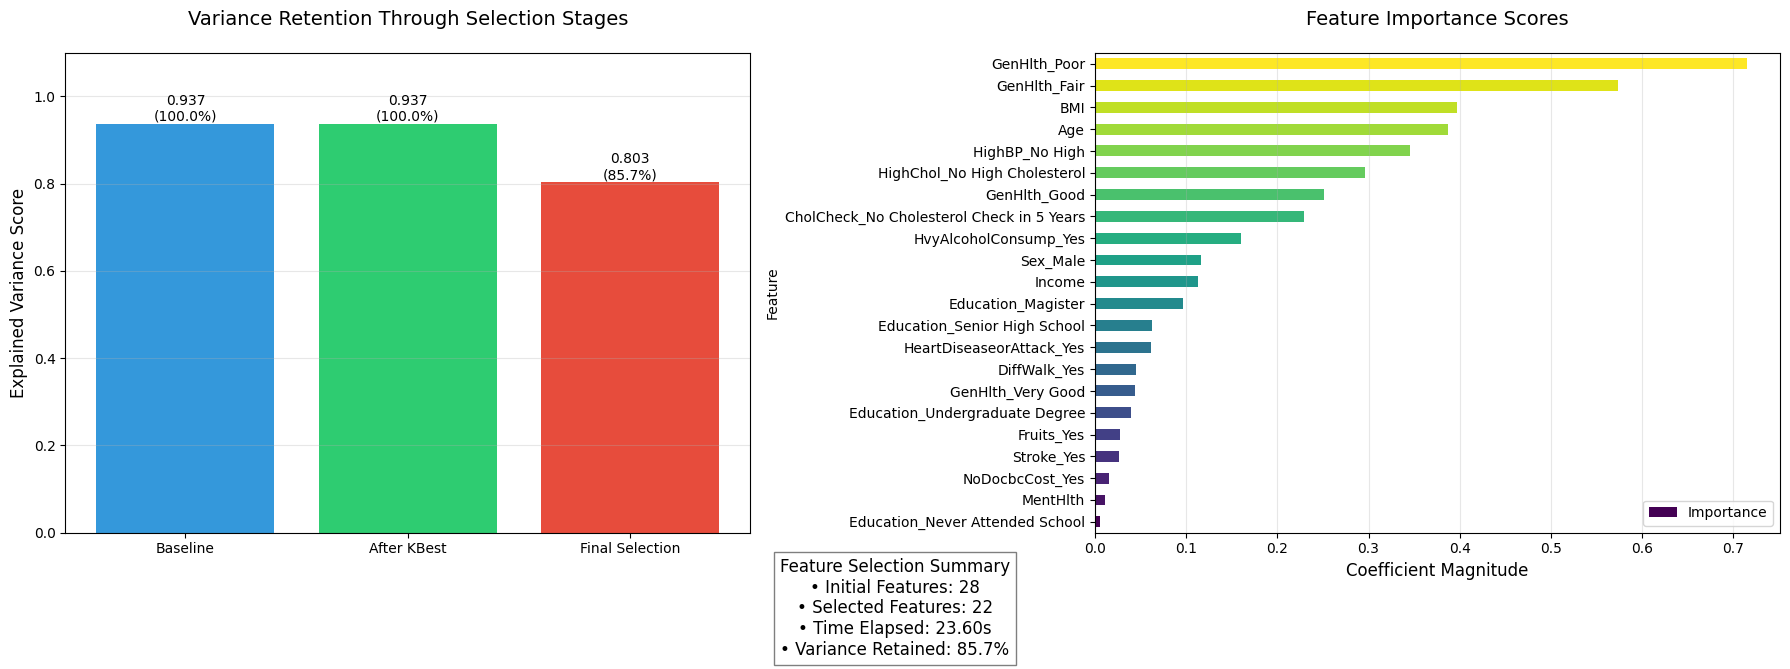

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import parallel_backend
from sklearn.metrics import explained_variance_score
import time

def optimized_feature_selection_with_variance(X_train, y_train, n_features):
    """
    Enhanced feature selection with improved visualization and reporting
    Returns:
    - Selected feature indices
    - Feature importance plot
    - Variance comparison plot
    - Detailed performance metrics
    """
    print("🚀 Starting optimized feature selection...")
    start_time = time.time()

    # Phase 0: Setup with progress tracking
    results = {
        'baseline': {'n_features': X_train.shape[1], 'variance': None},
        'kbest': {'n_features': None, 'variance': None},
        'final': {'n_features': n_features, 'variance': None}
    }

    # Phase 1: Baseline with all features
    print("\n🔍 Phase 1: Establishing baseline...")
    baseline_model = RandomForestClassifier(random_state=42, n_jobs=-1)
    baseline_model.fit(X_train, y_train)
    baseline_pred = baseline_model.predict(X_train)
    results['baseline']['variance'] = explained_variance_score(y_train, baseline_pred)

    # Phase 2: Initial filtering with feature importance
    print("\n⚙️ Phase 2: Initial feature filtering...")
    k_best = SelectKBest(f_classif, k=min(2*n_features, X_train.shape[1]))
    X_filtered = k_best.fit_transform(X_train, y_train)
    initial_features = X_train.columns[k_best.get_support()]
    results['kbest']['n_features'] = len(initial_features)

    # Phase 3: RFE with parallel processing
    print("\n🎯 Phase 3: Recursive Feature Elimination...")
    rfe = RFE(
        estimator=LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
        n_features_to_select=n_features,
        step=max(1, int(n_features/5)),  # Dynamic step size
        verbose=1
    )

    with parallel_backend('threading', n_jobs=-1):
        rfe.fit(X_train[initial_features], y_train)

    selected_features = initial_features[rfe.support_]
    support_mask = rfe.support_

    # Phase 4: Final evaluation
    print("\n📊 Phase 4: Final evaluation...")
    final_model = RandomForestClassifier(random_state=42, n_jobs=-1)
    final_model.fit(X_train[selected_features], y_train)
    final_pred = final_model.predict(X_train[selected_features])
    results['final']['variance'] = explained_variance_score(y_train, final_pred)

    # Generate enhanced visualizations
    plot_feature_selection_summary(
        results,
        feature_names=selected_features,
        importance_scores=rfe.estimator_.coef_[0] if hasattr(rfe.estimator_, 'coef_') else None,
        time_elapsed=time.time() - start_time
    )

    return selected_features

def plot_feature_selection_summary(results, feature_names, importance_scores=None, time_elapsed=None):
    """Enhanced visualization of feature selection results"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Plot 1: Variance Comparison
    stages = ['Baseline', 'After KBest', 'Final Selection']
    variances = [
        results['baseline']['variance'],
        results['kbest']['variance'] if results['kbest']['variance'] else results['baseline']['variance'],
        results['final']['variance']
    ]

    bars = ax1.bar(stages, variances, color=['#3498db', '#2ecc71', '#e74c3c'])
    ax1.set_title('Variance Retention Through Selection Stages', fontsize=14, pad=20)
    ax1.set_ylabel('Explained Variance Score', fontsize=12)
    ax1.set_ylim(0, 1.1)
    ax1.grid(axis='y', alpha=0.3)

    # Add variance retention percentages
    for bar, var in zip(bars, variances):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{var:.3f}\n({height/results["baseline"]["variance"]*100:.1f}%)',
                ha='center', va='bottom', fontsize=10)

    # Plot 2: Feature Importance (if available)
    if importance_scores is not None:
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': np.abs(importance_scores)
        }).sort_values('Importance', ascending=True)

        colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
        importance_df.plot.barh(x='Feature', y='Importance', ax=ax2, color=colors)
        ax2.set_title('Feature Importance Scores', fontsize=14, pad=20)
        ax2.set_xlabel('Coefficient Magnitude', fontsize=12)
        ax2.grid(axis='x', alpha=0.3)

    # Add summary text
    summary_text = (
        f"Feature Selection Summary\n"
        f"• Initial Features: {results['baseline']['n_features']}\n"
        f"• Selected Features: {results['final']['n_features']}\n"
        f"• Time Elapsed: {time_elapsed:.2f}s\n"
        f"• Variance Retained: {results['final']['variance']/results['baseline']['variance']*100:.1f}%"
    )

    plt.figtext(0.5, -0.1, summary_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()

# Usage example
selected_features = optimized_feature_selection_with_variance(
    X_train, y_train,
    n_features=22
)

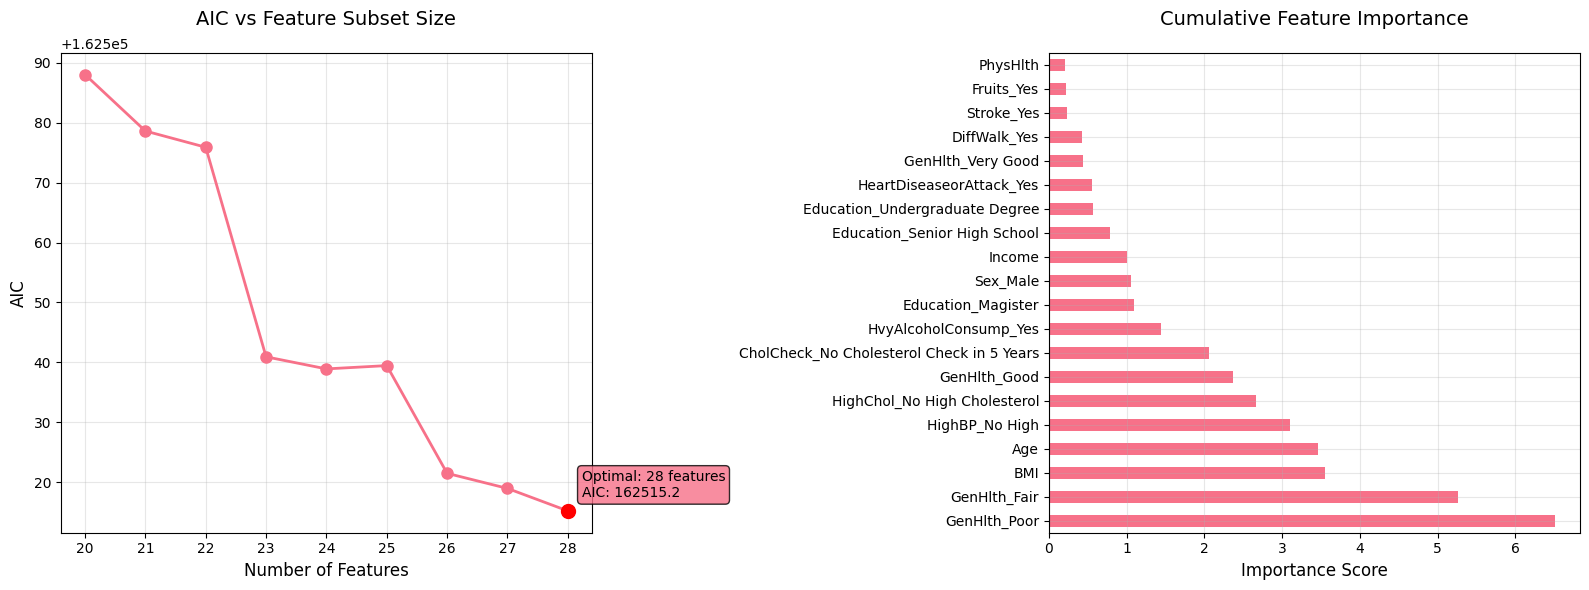


Optimal feature subset (28 features)
AIC: 162515.2

Selected features:
1. BMI (importance: 3.56)
2. MentHlth (importance: 0.02)
3. PhysHlth (importance: 0.20)
4. Age (importance: 3.47)
5. Income (importance: 1.01)
6. HighBP_No High (importance: 3.10)
7. HighChol_No High Cholesterol (importance: 2.66)
8. CholCheck_No Cholesterol Check in 5 Years (importance: 2.06)
9. Smoker_Yes (importance: 0.04)
10. Stroke_Yes (importance: 0.24)
11. HeartDiseaseorAttack_Yes (importance: 0.56)
12. PhysActivity_Yes (importance: 0.17)
13. Fruits_Yes (importance: 0.22)
14. Veggies_Yes (importance: 0.06)
15. HvyAlcoholConsump_Yes (importance: 1.44)
16. AnyHealthcare_Yes (importance: 0.01)
17. NoDocbcCost_Yes (importance: 0.10)
18. GenHlth_Fair (importance: 5.26)
19. GenHlth_Good (importance: 2.37)
20. GenHlth_Poor (importance: 6.51)
21. GenHlth_Very Good (importance: 0.44)
22. DiffWalk_Yes (importance: 0.43)
23. Sex_Male (importance: 1.06)
24. Education_Junior High School (importance: 0.14)
25. Education_M

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from matplotlib.ticker import MaxNLocator

def select_features_with_aic(X_train, y_train, max_features=None, step=1):
    """
    Enhanced feature selection using AIC with beautiful visualization.

    Args:
        X_train (pd.DataFrame): Training features
        y_train (pd.Series): Target variable
        max_features (int): Maximum number of features to consider
        step (int): Features to remove per iteration

    Returns:
        dict: Best features, AIC history, and visualization
    """
    # Initialize
    current_features = X_train.columns.tolist()
    best_aic = np.inf
    best_subset = current_features.copy()
    aic_history = []

    # Configure plot style
    sns.set_palette("husl")

    # Initialize model
    model = LogisticRegression(max_iter=2000, solver='liblinear',
                             random_state=42, penalty='l2', C=0.1)

    # Track feature importance
    feature_importance = {f: 0 for f in current_features}

    while len(current_features) > 1:
        # Fit model
        model.fit(X_train[current_features], y_train)

        # Calculate AIC
        y_pred = model.predict_proba(X_train[current_features])
        log_l = -log_loss(y_train, y_pred, normalize=False)
        aic = 2*(len(current_features)+1) - 2*log_l

        # Record history
        aic_history.append({
            'n_features': len(current_features),
            'features': current_features.copy(),
            'aic': aic,
            'log_likelihood': log_l
        })

        # Update best subset
        if aic < best_aic:
            best_aic = aic
            best_subset = current_features.copy()

        # Update feature importance (absolute coefficients)
        for i, f in enumerate(current_features):
            feature_importance[f] += np.abs(model.coef_[0][i])

        # Early stopping
        if max_features and len(current_features) <= max_features:
            break

        # Remove least important features
        coefs = np.abs(model.coef_[0])
        to_remove = np.argsort(coefs)[:step]
        current_features = [f for i, f in enumerate(current_features)
                          if i not in to_remove]

    # Generate visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: AIC trajectory
    n_features = [x['n_features'] for x in aic_history]
    aics = [x['aic'] for x in aic_history]

    ax1.plot(n_features, aics, 'o-', linewidth=2, markersize=8)
    ax1.set_xlabel('Number of Features', fontsize=12)
    ax1.set_ylabel('AIC', fontsize=12)
    ax1.set_title('AIC vs Feature Subset Size', fontsize=14, pad=20)
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.grid(True, alpha=0.3)

    # Mark optimal point
    opt_idx = np.argmin(aics)
    ax1.plot(n_features[opt_idx], aics[opt_idx], 'ro', markersize=10)
    ax1.annotate(f'Optimal: {n_features[opt_idx]} features\nAIC: {aics[opt_idx]:.1f}',
                xy=(n_features[opt_idx], aics[opt_idx]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round', alpha=0.8))

    # Plot 2: Feature importance
    importance_df = pd.DataFrame.from_dict(feature_importance,
                                          orient='index',
                                          columns=['importance'])
    importance_df = importance_df.sort_values('importance', ascending=False)
    importance_df.head(20).plot(kind='barh', ax=ax2, legend=False)
    ax2.set_title('Cumulative Feature Importance', fontsize=14, pad=20)
    ax2.set_xlabel('Importance Score', fontsize=12)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return {
        'best_features': best_subset,
        'best_aic': best_aic,
        'history': aic_history,
        'feature_importance': feature_importance,
        'optimal_num_features': n_features[opt_idx]
    }

# Usage example
results = select_features_with_aic(
    X_train,
    y_train,
    max_features=20,
    step=1
)

print(f"\n{'='*50}")
print(f"Optimal feature subset ({results['optimal_num_features']} features)")
print(f"AIC: {results['best_aic']:.1f}")
print(f"{'='*50}\n")
print("Selected features:")
for i, f in enumerate(results['best_features'], 1):
    print(f"{i}. {f} (importance: {results['feature_importance'][f]:.2f})")

train_processed , scaler = preprocess_data2(train_raw, fit_scaler=True,split=False)

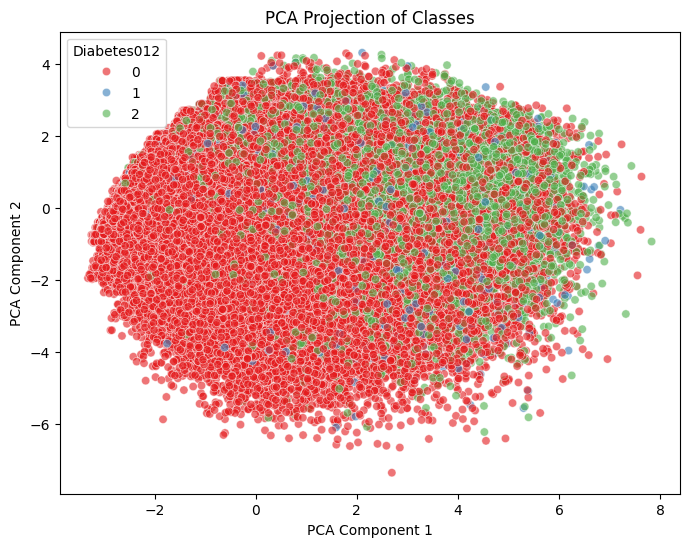

In [40]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='Set1', alpha=0.6)
plt.title("PCA Projection of Classes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Diabetes012')
plt.show()

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

class CustomMultiLDA(BaseEstimator, TransformerMixin):
    """Multi-class LDA using One-vs-Rest strategy"""
    def __init__(self):
        self.models = {}
        self.scaler = StandardScaler()

    def fit(self, X, y):
        X = self.scaler.fit_transform(X)
        self.classes_ = np.unique(y)

        for cls in self.classes_:
            y_bin = (y == cls).astype(int)
            X0 = X[y_bin == 0]
            X1 = X[y_bin == 1]

            mean0 = np.mean(X0, axis=0)
            mean1 = np.mean(X1, axis=0)

            Sw = (X0 - mean0).T @ (X0 - mean0) + (X1 - mean1).T @ (X1 - mean1)
            Sb = (mean0 - mean1).reshape(-1, 1) @ (mean0 - mean1).reshape(1, -1)

            eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(Sw + 1e-6*np.eye(Sw.shape[0])) @ Sb)
            w = eig_vecs[:, np.argmax(eig_vals)].real
            w /= np.linalg.norm(w)

            projections = X @ w
            threshold = (np.mean(projections[y_bin == 0]) + np.mean(projections[y_bin == 1])) / 2

            self.models[cls] = {"w": w, "threshold": threshold}

        return self

    def transform(self, X):
        X = self.scaler.transform(X)
        transformed = {cls: X @ model["w"] for cls, model in self.models.items()}
        return np.column_stack(list(transformed.values()))

    def predict(self, X):
        X = self.scaler.transform(X)
        scores = []
        for cls, model in self.models.items():
            w = model["w"]
            threshold = model["threshold"]
            proj = X @ w
            scores.append(proj - threshold)  # how far past threshold
        scores = np.column_stack(scores)
        return self.classes_[np.argmax(scores, axis=1)]


def apply_custom_lda(X_train, X_test, y_train, y_test, dataset_name):
    """Enhanced LDA application with better reporting"""
    try:
        # Convert to binary classification
        y_train_bin = y_train
        y_test_bin = y_test


        # Apply and time CustomLDA
        start_time = time.time()
        lda = CustomMultiLDA()
        lda.fit(X_train, y_train_bin)
        y_pred = lda.predict(X_test)
        elapsed = time.time() - start_time

        # Enhanced evaluation
        print(f"\n{'='*50}")
        print(f"LDA RESULTS: {dataset_name.upper()}")
        print(f"{'='*50}")
        print(f"⏱️ Execution Time: {elapsed:.2f}s")
        print(f"🔢 Accuracy: {accuracy_score(y_test_bin, y_pred):.4f}")
        print("\n📊 Classification Report:")
        print(classification_report(y_test_bin, y_pred))
        print("\n🧮 Confusion Matrix:")
        print(confusion_matrix(y_test_bin, y_pred))

        return lda

    except Exception as e:
        print(f"\n❌ Error processing {dataset_name}: {str(e)}")
        return None

# PCA Transformation (using your existing pca_model)
X_train_pca = pca_model.transform(X_train)  # Using your existing PCA model
X_test_pca = pca_model.transform(X_test)

#  Run Analyses
print("\n=== ORIGINAL FEATURES ===")
lda_original = apply_custom_lda(X_train, X_test, y_train, y_test, "Original Features")

print("\n=== PCA TRANSFORMED FEATURES ===")
lda_pca = apply_custom_lda(X_train_pca, X_test_pca, y_train, y_test, "PCA-Transformed Features")

# Selected Features (if available)
if 'selected_features' in globals():
    # Convert feature names to indices if needed
    if isinstance(selected_features[0], str):  # If features are named
        # Get the indices of selected features
        feature_names = list(X_train.columns) if hasattr(X_train, 'columns') else []
        selected_indices = [feature_names.index(f) for f in selected_features if f in feature_names]
    else:
        selected_indices = selected_features  # Assume they're already indices

    # Ensure we have valid indices
    if len(selected_indices) > 0:
        X_train_selected = X_train.iloc[:, selected_indices]
        X_test_selected = X_test.iloc[:, selected_indices]
        print(f"\n=== SELECTED FEATURES ({len(selected_indices)} features) ===")
        lda_selected = apply_custom_lda(X_train_selected, X_test_selected,
                                      y_train, y_test, "Selected Features")
    else:
        print("\n⚠️ No valid selected features found - skipping this analysis")
else:
    print("\nℹ️ Selected features not available - skipping this analysis")


=== ORIGINAL FEATURES ===

LDA RESULTS: ORIGINAL FEATURES
⏱️ Execution Time: 1.19s
🔢 Accuracy: 0.1397

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.13      0.22     42741
           1       0.02      0.64      0.04       926
           2       0.05      0.12      0.07      7069

    accuracy                           0.14     50736
   macro avg       0.25      0.30      0.11     50736
weighted avg       0.58      0.14      0.20     50736


🧮 Confusion Matrix:
[[ 5625 21861 15255]
 [  212   594   120]
 [ 2397  3802   870]]

=== PCA TRANSFORMED FEATURES ===

LDA RESULTS: PCA-TRANSFORMED FEATURES
⏱️ Execution Time: 0.79s
🔢 Accuracy: 0.2674

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.27      0.41     42741
           1       0.02      0.62      0.04       926
           2       0.19      0.19      0.19      7069

    accuracy                           0.27 

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def apply_builtin_lda(X_train, X_test, y_train, y_test, dataset_name):
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import time

    try:
        start_time = time.time()
        lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')  # better numerics
        lda.fit(X_train, y_train)
        y_pred = lda.predict(X_test)
        elapsed = time.time() - start_time

        print(f"\n{'='*50}")
        print(f"LDA RESULTS: {dataset_name.upper()}")
        print(f"{'='*50}")
        print(f"⏱️ Execution Time: {elapsed:.2f}s")
        print(f"🔢 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\n📊 Classification Report:")
        print(classification_report(y_test, y_pred))
        print("\n🧮 Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        return lda
    except Exception as e:
        print(f"❌ Error: {e}")
        return None


In [ ]:
lda_model = apply_builtin_lda(X_train, X_test, y_train, y_test, dataset_name="Diab_LDA_LIP")

In [43]:
# 1. First get your processed data
train_processed, scaler = preprocess_data2(train_raw, fit_scaler=True, split=False)

# 2. Convert to DataFrame with proper column names
if isinstance(train_processed, np.ndarray):
    # Create column names
    n_features = train_processed.shape[1] - 1  # Last column is target
    feature_cols = [f"feature_{i}" for i in range(n_features)]
    cols = feature_cols + ['Diabetes_binary']  # Add target column name

    train_processed_df = pd.DataFrame(train_processed, columns=cols)
else:
    train_processed_df = train_processed  # Already a DataFrame

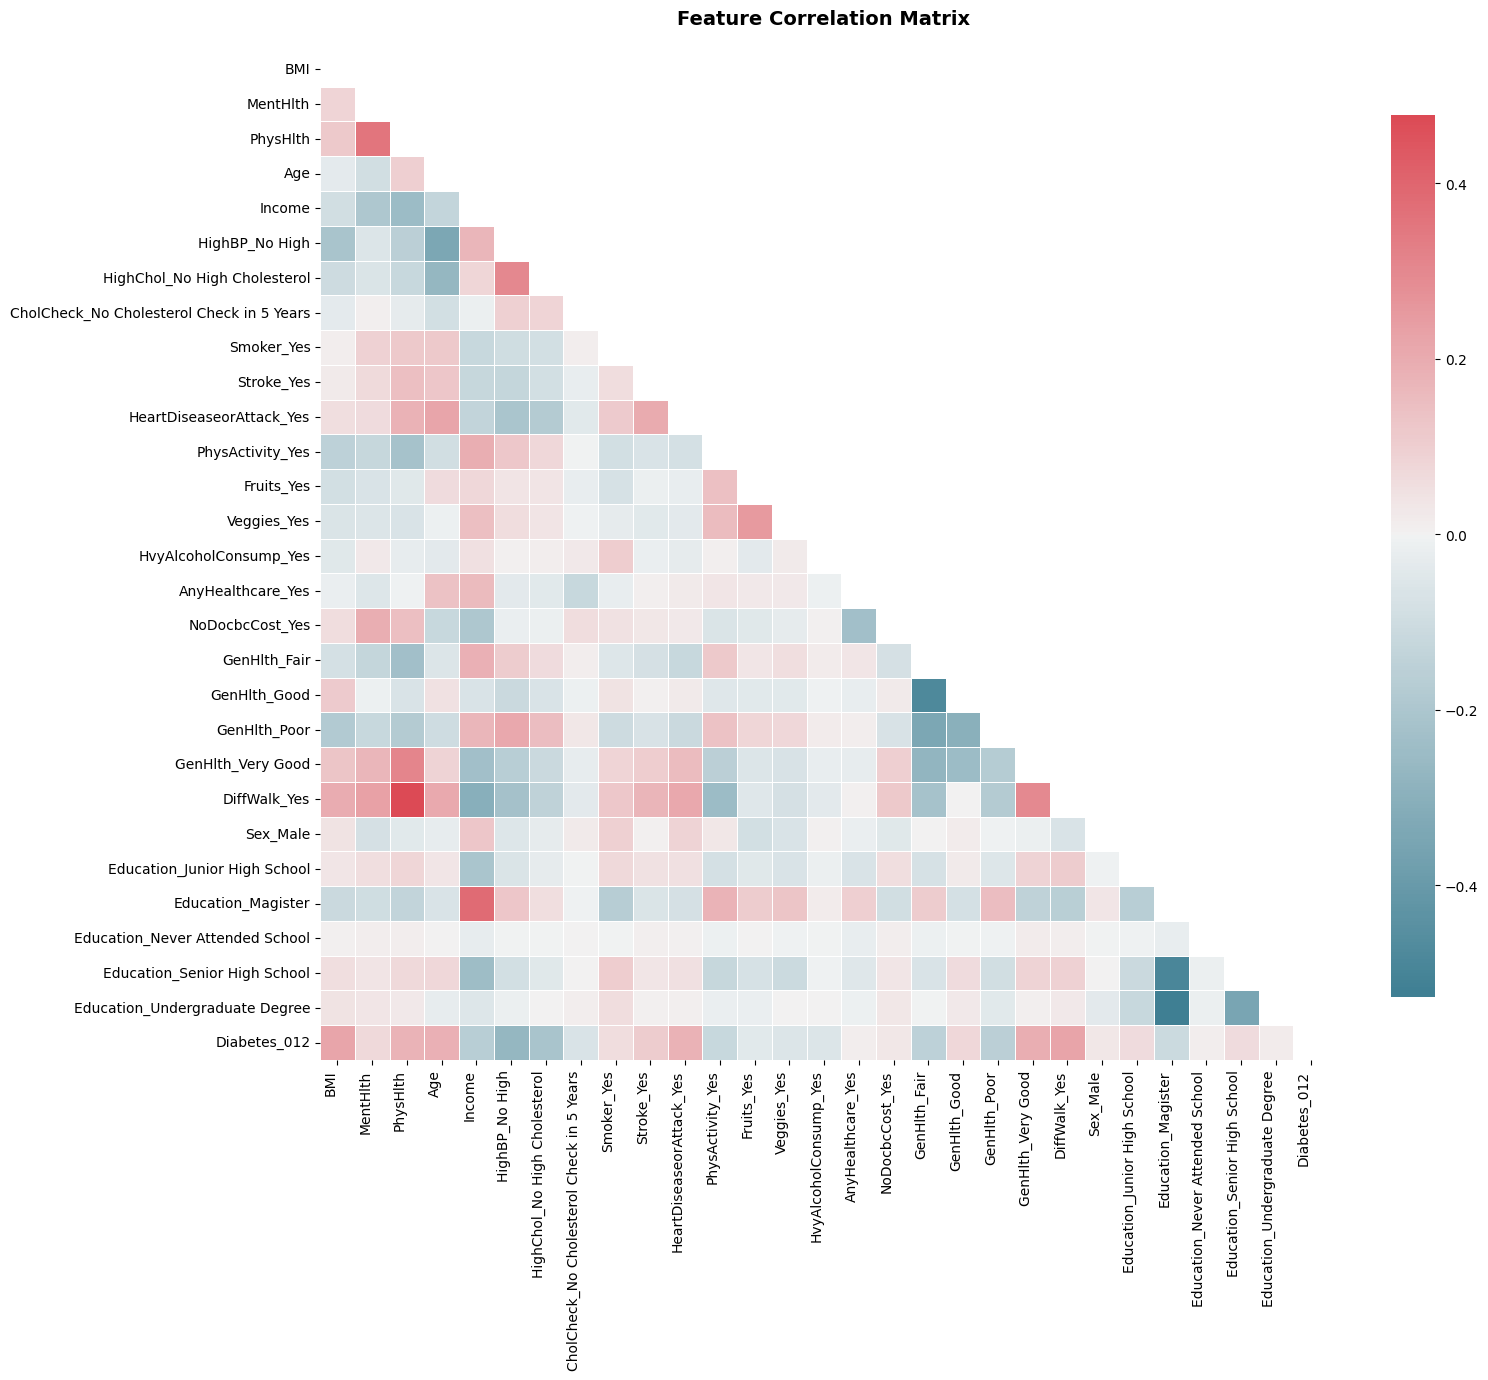

In [44]:
def plot_enhanced_correlation(df, figsize=(16, 14)):
    """
    Creates a publication-quality correlation heatmap with your preferred style
    """
    # Calculate correlations
    corr = df.corr()

    # Create mask for upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up matplotlib figure
    plt.figure(figsize=figsize, dpi=100)

    # Custom diverging colormap (similar to your example)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                annot=False, fmt=".2f")

    # Add feature names on both axes
    plt.xticks(np.arange(len(corr.columns)) + 0.5, corr.columns,
               rotation=90, ha='right', fontsize=10)
    plt.yticks(np.arange(len(corr.columns)) + 0.5, corr.columns,
               rotation=0, va='center', fontsize=10)

    # Add title with padding
    plt.title('Feature Correlation Matrix', pad=20, fontsize=14, weight='bold')

    # Adjust layout to prevent cutoff
    plt.tight_layout()
    plt.show()

# Usage with your data:
if isinstance(train_processed, np.ndarray):
    # Convert numpy array to DataFrame
    n_features = train_processed.shape[1] - 1  # Assuming last column is target
    columns = [f'feature_{i}' for i in range(n_features)] + ['Diabetes_binary']
    df = pd.DataFrame(train_processed, columns=columns)
else:
    df = train_processed

# Plot with enhanced style
plot_enhanced_correlation(df)

# For large datasets, plot a subset
if df.shape[1] > 30:
    print("\nPlotting subset of first 30 features...")
    plot_enhanced_correlation(df.iloc[:, :30])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.0 MB/s eta 0:00:00


Class Distribution Before SMOTE:
Diabetes_012
0    0.842410
2    0.139334
1    0.018256
Name: proportion, dtype: float64

Class Distribution After SMOTE:
Diabetes_012
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Starting optimized parameter search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Search completed in 2381.7 seconds
Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 45}

=== Test Set Performance ===
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     42741
           1       0.02      0.05      0.02       926
           2       0.23      0.02      0.03      7069

    accuracy                           0.78     50736
   macro avg       0.36      0.33      0.31     50736
weighted avg       0.74      0.78      0.75     50736



<Figure size 800x600 with 0 Axes>

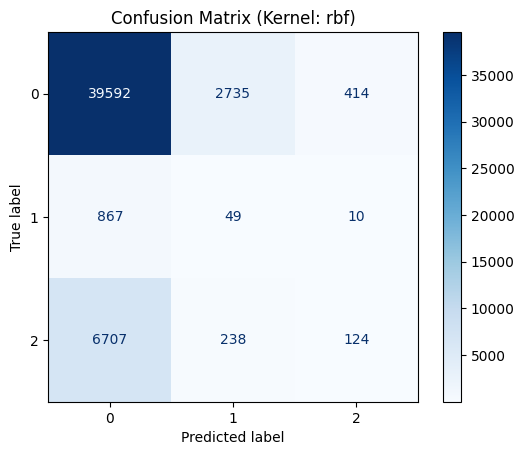

In [46]:
def optimized_svm_pipeline_with_smote(X_train, y_train, X_test, y_test):
    """Optimized SVM pipeline with SMOTE and parameter tuning"""

    # Analyze class distribution before SMOTE
    class_counts = pd.Series(y_train).value_counts(normalize=True)
    print(f"Class Distribution Before SMOTE:\n{class_counts}\n")

    # Apply SMOTE to balance the training set
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Analyze class distribution after SMOTE
    resampled_counts = pd.Series(y_train_res).value_counts(normalize=True)
    print(f"Class Distribution After SMOTE:\n{resampled_counts}\n")

    # Define hyperparameters
    param_dist = {
        'C': [50],
        'gamma': [0.1],
        'kernel': ['rbf'],
        'class_weight': ['balanced']
    }

    # Initialize SVM
    svm = SVC(
        probability=True,
        random_state=42,
        cache_size=1000,
        tol=1e-3,
        max_iter=1000
    )

    # Randomized SearchCV
    print("Starting optimized parameter search...")
    start_time = time.time()

    search = RandomizedSearchCV(
        svm,
        param_distributions=param_dist,
        n_iter=1,  # Only 1 since we have a single param combo
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    with parallel_backend('loky'):
        search.fit(X_train, y_train_res)

    print(f"\nSearch completed in {time.time()-start_time:.1f} seconds")
    print(f"Best Parameters: {search.best_params_}")

    # Evaluate best model
    best_svm = search.best_estimator_
    y_pred = best_svm.predict(X_test)

    print("\n=== Test Set Performance ===")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=best_svm.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix (Kernel: {best_svm.kernel})")
    plt.show()

    return best_svm

# Example usage
best_model = optimized_svm_pipeline_with_smote(X_train, y_train, X_test, y_test)
